# Exercise 1 – Regression Task

## House Price Predictions With Linear Regression
This project predicts house prices using Linear Regression and Decision Tree models

# 1. **Introduction**
🏡 **House Price Prediction Project**

This project uses linear regression to predict house prices based on features like area, number of rooms, and location. Predicting prices helps real estate companies and buyers make better financial decisions.

# 2. **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

# 3. **Loading the Dataset**

In [2]:
train = pd.read_csv('/kaggle/input/real-estate-price-predictions/train.csv')
test  = pd.read_csv('/kaggle/input/real-estate-price-predictions/test.csv')
sample_sub = pd.read_csv('/kaggle/input/real-estate-price-predictions/sample_submission.csv')
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


# 4. Data Exploration & Cleaning

In [5]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [6]:
print("Numeric columns:", len(numeric_features))
print("Categorical columns:", len(categorical_features))

Numeric columns: 37
Categorical columns: 43


# 5. Data Preprocessing

## Numeric Transformer

In [7]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

## Categorical Transformer

In [8]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

## Preprocessor

In [9]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 6. Model Training

## Linear Regression Pipeline

In [10]:
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [11]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrS...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

## Decision Tree Pipeline

In [12]:
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

In [13]:
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrS...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

# 7. Model Evaluation Metrics

In [14]:
y_pred_lr = lr_pipeline.predict(X_valid)
y_pred_dt = dt_pipeline.predict(X_valid)

In [15]:
def regression_metrics(y_true, y_pred, name='Model'):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {name} Performance:")
    print(f"MAE:  {mae:.2f}")
    print(f"MSE:  {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.4f}")

In [16]:
regression_metrics(y_valid, y_pred_lr, name='Linear Regression')
regression_metrics(y_valid, y_pred_dt, name='Decision Tree')


📊 Linear Regression Performance:
MAE:  18284.86
MSE:  868793562.31
RMSE: 29475.30
R²:   0.8867

📊 Decision Tree Performance:
MAE:  27668.29
MSE:  1751674673.71
RMSE: 41853.01
R²:   0.7716


## Price Visualisation

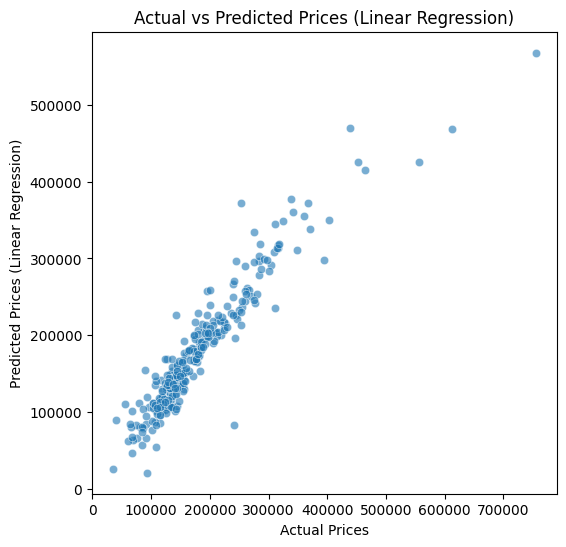

In [17]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_valid, y=y_pred_lr, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Linear Regression)")
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.show()
mae = mean_absolute_error(y_valid, y_pred_lr)
mse = mean_squared_error(y_valid, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, y_pred_lr)

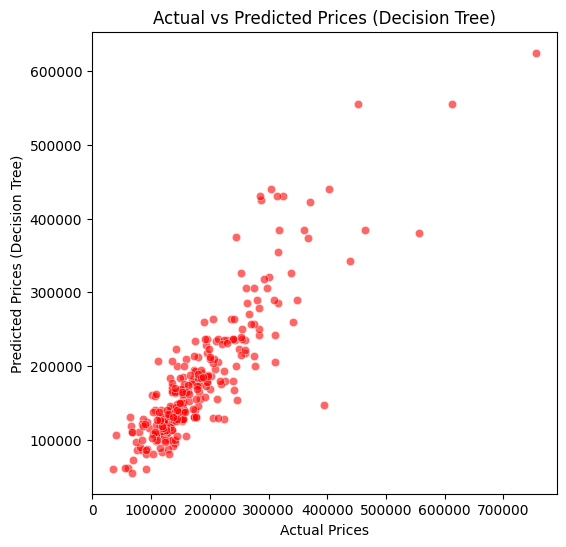

In [18]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_valid, y=y_pred_dt, alpha=0.6, color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Decision Tree)")
plt.title("Actual vs Predicted Prices (Decision Tree)")
plt.show()

mae = mean_absolute_error(y_valid, y_pred_lr)
mse = mean_squared_error(y_valid, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, y_pred_lr)

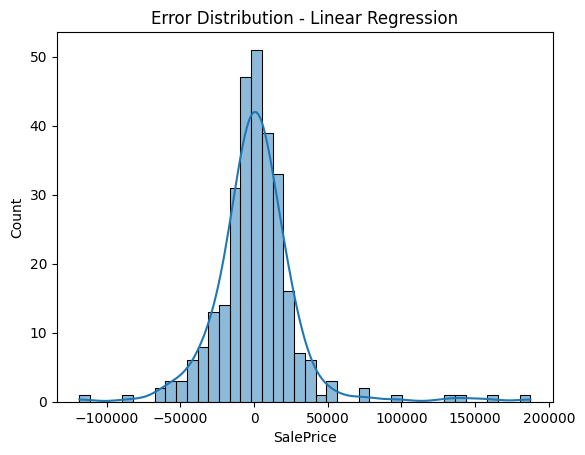

In [19]:
errors_lr = y_valid - y_pred_lr
sns.histplot(errors_lr, kde=True)
plt.title("Error Distribution - Linear Regression")
plt.show
mae = mean_absolute_error(y_valid, y_pred_lr)
mse = mean_squared_error(y_valid, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, y_pred_lr)

In [20]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 18284.857566149007
Mean Squared Error: 868793562.3121237
Root Mean Squared Error: 29475.304278533302
R² Score: 0.8867331663811038


In [21]:
print("Train shape:", train.shape)
print("Test shape: ", test.shape)
display(train.head())

Train shape: (1460, 81)
Test shape:  (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Missing Values

In [22]:
print("\n--- Missing values (top 30) ---")
missing = train.isnull().sum().sort_values(ascending=False)
display(missing[missing > 0].head(30))


--- Missing values (top 30) ---


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [23]:
print("\nNumeric summary (selected):")
display(train.describe().T[['count','mean','std','min','25%','50%','75%','max']].head(10))


Numeric summary (selected):


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


## Target distribution

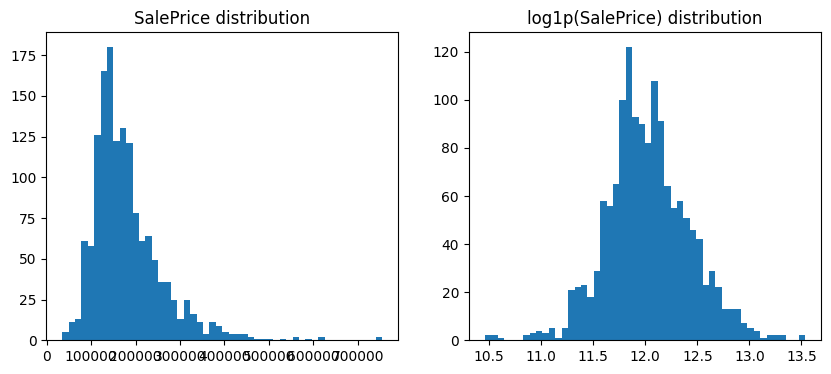

In [24]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(train['SalePrice'], bins=50)
plt.title("SalePrice distribution")
plt.subplot(1,2,2)
plt.hist(np.log1p(train['SalePrice']), bins=50)
plt.title("log1p(SalePrice) distribution")
plt.show()

In [25]:
train['SalePrice_log'] = np.log1p(train['SalePrice'])

## Feature selection strategy

In [26]:
numeric_cols = train.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c not in ['Id', 'SalePrice', 'SalePrice_log']]
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()

In [27]:
print("\nNumeric cols count:", len(numeric_cols))
print("Categorical cols count:", len(categorical_cols))


Numeric cols count: 36
Categorical cols count: 43


# 8. Preprocessing Pipelines

In [28]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [29]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='MISSING')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [30]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='drop'
)

## Prepare training data

In [31]:
X = train.drop(['Id','SalePrice','SalePrice_log'], axis=1, errors='ignore')
y = train['SalePrice_log'] 

In [32]:
X_test_final = test.copy() 

## Train-test split for evaluation

In [33]:
X_train, X_valid, y_train, y_valid = train_test_split(
    train.drop(['Id','SalePrice','SalePrice_log'], axis=1, errors='ignore'),
    y,
    test_size=0.2,
    random_state=42
)

In [34]:
print("Train split:", X_train.shape, y_train.shape)
print("Validation split:", X_valid.shape, y_valid.shape)

Train split: (1168, 79) (1168,)
Validation split: (292, 79) (292,)


# 9. Pipelines

## Linear Regression

In [35]:
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [36]:
print("\nFitting Linear Regression...")
lr_pipeline.fit(X_train, y_train)


Fitting Linear Regression...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQual...
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('regressor', LinearRegression())])

In [37]:
y_valid_pred_log = lr_pipeline.predict(X_valid)
y_valid_pred = np.expm1(y_valid_pred_log) 
y_valid_true = np.expm1(y_valid) 

In [38]:
def regression_metrics(y_true, y_pred, prefix=''):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{prefix} MAE:  {mae:,.2f}")
    print(f"{prefix} RMSE: {rmse:,.2f}")
    print(f"{prefix} R2:   {r2:.4f}")
    return mae, mse, rmse, r2

In [39]:
y_valid_true = np.array(y_valid_true)
y_valid_pred = np.array(y_valid_pred)

In [40]:
mask = np.isfinite(y_valid_true) & np.isfinite(y_valid_pred)
y_valid_true = y_valid_true[mask]
y_valid_pred = y_valid_pred[mask]

In [41]:
print(f"After cleaning: {len(y_valid_true)} valid samples remain for evaluation")

After cleaning: 289 valid samples remain for evaluation


In [42]:
print("\n--- Linear Regression (validation set) on ORIGINAL scale ---")
lr_metrics = regression_metrics(y_valid_true, y_valid_pred, prefix='LinearReg')


--- Linear Regression (validation set) on ORIGINAL scale ---
LinearReg MAE:  14,935.05
LinearReg RMSE: 22,631.31
LinearReg R2:   0.9335


## Cross-validation for Linear Regression

In [43]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(lr_pipeline, train.drop(['Id','SalePrice','SalePrice_log'], axis=1), train['SalePrice_log'],
                            scoring='neg_root_mean_squared_error', cv=kf)
print("\nLinear Regression 5-fold CV (neg_root_mean_squared_error):")
print("Scores (neg RMSE):", np.round(cv_scores,4))
print("Mean CV RMSE (log-scale):", -np.mean(cv_scores))


Linear Regression 5-fold CV (neg_root_mean_squared_error):
Scores (neg RMSE): [-4.38222882e+08 -9.40818097e+08 -2.34090543e+09 -1.02015232e+10
 -7.20747657e+07]
Mean CV RMSE (log-scale): 2798708868.3220553


## Decision Tree

In [44]:
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=8, random_state=42))
])

In [45]:
print("\nFitting Decision Tree (max_depth=8)...")
dt_pipeline.fit(X_train, y_train)


Fitting Decision Tree (max_depth=8)...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQual...
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('regressor',
                 DecisionTreeRegressor(max_depth=8, random_state=42))])

In [46]:
y_valid_pred_dt_log = dt_pipeline.predict(X_valid)
y_valid_pred_dt = np.expm1(y_valid_pred_dt_log)

In [47]:
y_valid_true_dt = np.array(y_valid_true)
y_valid_pred_dt = np.array(y_valid_pred_dt)


In [48]:
min_len = min(len(y_valid_true_dt), len(y_valid_pred_dt))
y_valid_true_dt = y_valid_true_dt[:min_len]
y_valid_pred_dt = y_valid_pred_dt[:min_len]

In [49]:
mask_dt = np.isfinite(y_valid_true_dt) & np.isfinite(y_valid_pred_dt)
y_valid_true_dt = y_valid_true_dt[mask_dt]
y_valid_pred_dt = y_valid_pred_dt[mask_dt]

In [50]:
print(f"After cleaning Decision Tree values: {len(y_valid_true_dt)} valid samples remain for evaluation")

After cleaning Decision Tree values: 289 valid samples remain for evaluation


In [51]:
print("\n--- Decision Tree (validation set) on ORIGINAL scale ---")
dt_metrics = regression_metrics(y_valid_true_dt, y_valid_pred_dt, prefix='DecisionTree')


--- Decision Tree (validation set) on ORIGINAL scale ---
DecisionTree MAE:  60,990.97
DecisionTree RMSE: 94,147.28
DecisionTree R2:   -0.1516


# 10. Visualisations

## Actual vs Predicted Algorithms

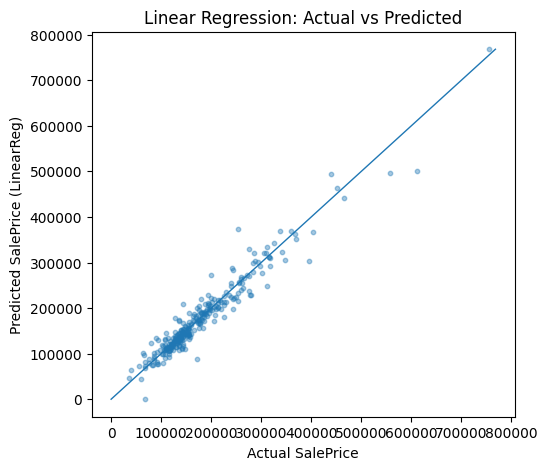

In [52]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_valid_true, y_valid_pred, alpha=0.4, s=10)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice (LinearReg)")
plt.title("Linear Regression: Actual vs Predicted")
mn = min(y_valid_true.min(), y_valid_pred.min())
mx = max(y_valid_true.max(), y_valid_pred.max())
plt.plot([mn, mx], [mn, mx], linewidth=1)

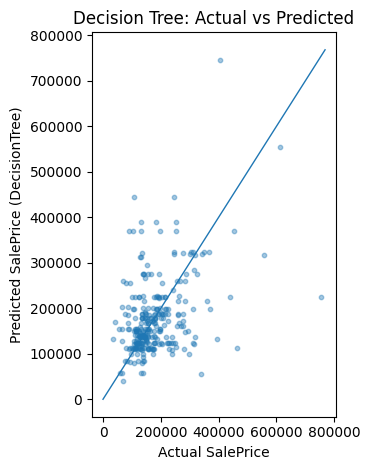

In [53]:
plt.subplot(1,2,2)
plt.scatter(y_valid_true, y_valid_pred_dt, alpha=0.4, s=10)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice (DecisionTree)")
plt.title("Decision Tree: Actual vs Predicted")
plt.plot([mn, mx], [mn, mx], linewidth=1)
plt.tight_layout()
plt.show()

In [54]:
res_lr = y_valid_true - y_valid_pred
res_dt = y_valid_true - y_valid_pred_dt

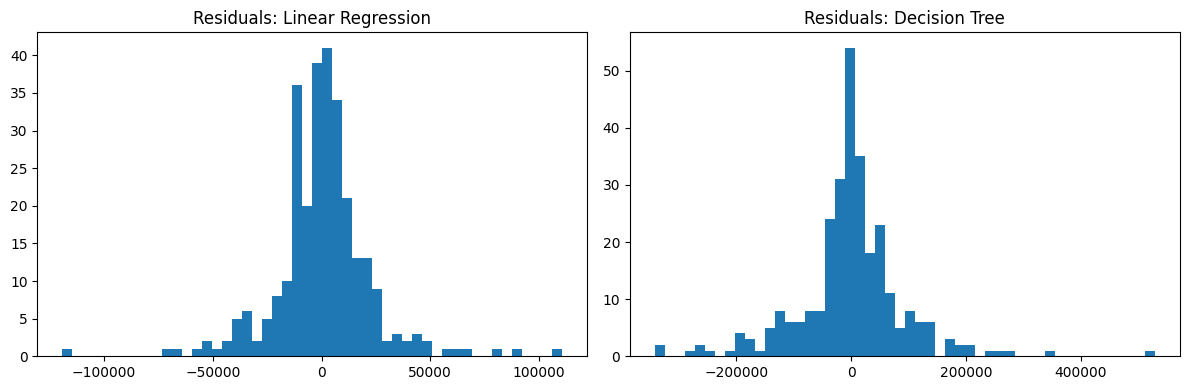

In [55]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(res_lr, bins=50)
plt.title("Residuals: Linear Regression")
plt.subplot(1,2,2)
plt.hist(res_dt, bins=50)
plt.title("Residuals: Decision Tree")
plt.tight_layout()
plt.show()


# 11. Coefficients

In [56]:
print("\nTop Decision Tree feature importances (post-preprocessing):")


Top Decision Tree feature importances (post-preprocessing):


In [57]:
preprocessor.fit(train.drop(['Id','SalePrice','SalePrice_log'], axis=1))

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['MSSubClass', 'LotFrontage', 'LotArea',
                                  'OverallQual', 'OverallCond', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                  'GrLivArea', 'BsmtFullBath...
                                 ['MSZoning', 'Street', 'Alley', 'LotShape',
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'Neighborhood', 'Condition1',
                                  'Condition2', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'Exterior2nd', 'MasVnrType', 'ExterQual',
                                  'ExterCond', 'Foundation', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC',
                                  'CentralAir', 'Electrical', ...])])

In [58]:
num_features = numeric_cols

In [59]:
cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols).tolist()
feature_names = num_features + cat_features

In [60]:
dt_reg = dt_pipeline.named_steps['regressor']
preprocessor = dt_pipeline.named_steps['preprocessor']
num_features = preprocessor.transformers_[0][2]
cat_features = list(preprocessor.transformers_[1][1].get_feature_names_out(preprocessor.transformers_[1][2]))
all_feature_names = np.concatenate([num_features, cat_features])


In [61]:
print(f"Features in model: {len(all_feature_names)}, Importances: {len(dt_reg.feature_importances_)}")

Features in model: 303, Importances: 301


In [62]:
min_len = min(len(dt_reg.feature_importances_), len(all_feature_names))
feat_imp = pd.Series(dt_reg.feature_importances_[:min_len], index=all_feature_names[:min_len]).sort_values(ascending=False)

In [63]:
display(feat_imp.head(20))

OverallQual             0.575650
GrLivArea               0.138239
TotalBsmtSF             0.080707
GarageCars              0.029480
BsmtFinSF1              0.019171
HeatingQC_TA            0.016598
OverallCond             0.015448
GarageType_BuiltIn      0.009867
BsmtUnfSF               0.009745
1stFlrSF                0.007982
GarageArea              0.007967
LotArea                 0.006041
OpenPorchSF             0.006018
PoolQC_MISSING          0.005837
Condition2_Norm         0.004936
YearBuilt               0.004167
LotFrontage             0.004146
CentralAir_N            0.004062
BsmtExposure_Av         0.003767
Neighborhood_Crawfor    0.003697
dtype: float64

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


# 12. Save validation predictions sample

In [65]:
X_valid = X_valid.iloc[:len(y_valid_true)].copy()

val_out = X_valid.copy()
val_out['actual'] = y_valid_true
val_out['pred_linear'] = y_valid_pred
val_out['pred_tree'] = y_valid_pred_dt

val_out_sample = val_out.sample(min(200, val_out.shape[0]))
val_out_sample.to_csv('validation_predictions_sample.csv', index=False)
print("\nSaved sample validation predictions to 'validation_predictions_sample.csv'")


Saved sample validation predictions to 'validation_predictions_sample.csv'


## Prepare final predictions for Kaggle test set

In [66]:
print("\nRetraining Linear Regression on FULL training data...")
lr_pipeline_full = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])
lr_pipeline_full.fit(train.drop(['Id','SalePrice','SalePrice_log'], axis=1), train['SalePrice_log'])


Retraining Linear Regression on FULL training data...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQual...
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('regressor', LinearRegression())])

In [67]:
test_preds_log = lr_pipeline_full.predict(test)
test_preds = np.expm1(test_preds_log)

## Saved Submission File

In [68]:
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': test_preds})
submission.to_csv('submission_linear_regression.csv', index=False)
print("Saved submission file: 'submission_linear_regression.csv'")

Saved submission file: 'submission_linear_regression.csv'
